# Data Visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

Trying to delete na values and duplicate values

In [2]:
df = pd.read_csv("creditcard.csv")
#df.info
df_without_na = df.dropna()
df_without_duplicate = df.drop_duplicates()
print(df.shape)
df.head(10)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
X = df.drop("Class",axis=1)
y = df["Class"]
print("Number of frauds in the dataset : ",(y==1).sum())
print("Number of no-frauds : ",len(y))
print("Percentage of frauds : ", round((y.sum() / len(y))*100,2),"%")
print("Percentage of no-frauds : ", round((1 - (y.sum() / len(y)))*100,2) ,"%")

Number of frauds in the dataset :  492
Number of no-frauds :  284807
Percentage of frauds :  0.17 %
Percentage of no-frauds :  99.83 %


In [4]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Understanding the correlation between variables that we can see, in this case variables 'time', 'Amount', 'Class'.

In [5]:
df_without_v = df[["Time", "Amount", "Class"]]
df_without_v.head(10)
#df_without_v.info

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
5,2.0,3.67,0
6,4.0,4.99,0
7,7.0,40.80,0
8,7.0,93.20,0
9,9.0,3.68,0


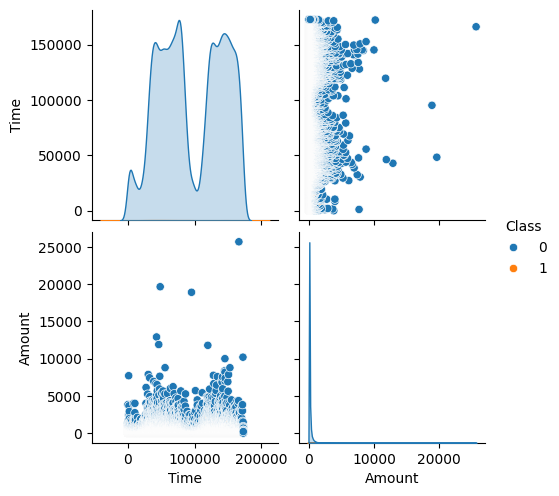

In [6]:
sn.pairplot(df_without_v, hue='Class')

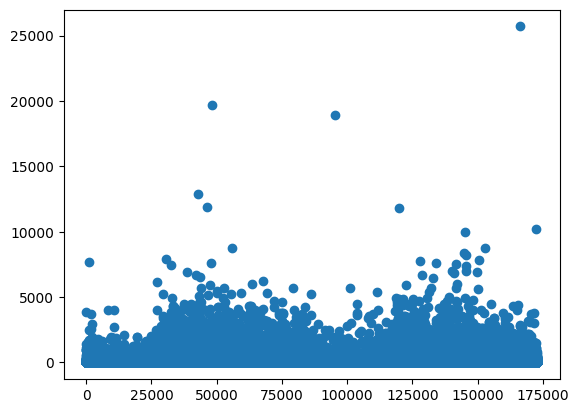

In [7]:
plt.scatter(df_without_v["Time"],df_without_v["Amount"])
plt.show()

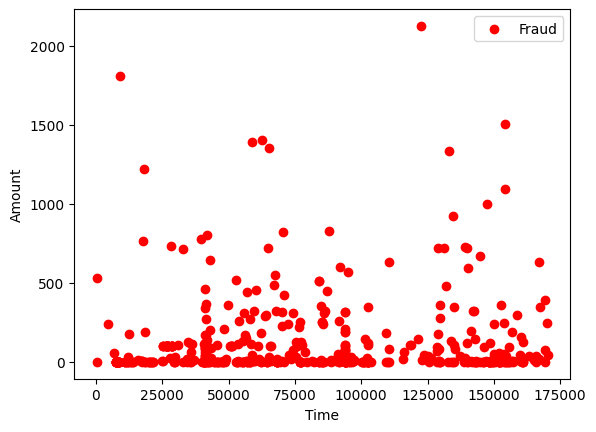

In [8]:
#plt.scatter(df["Time"], df["Amount"], color='blue', label='Non-fraud')
df_class_1 = df[df['Class'] == 1]
plt.scatter(df_class_1["Time"],df_class_1["Amount"], color='red', label='Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()

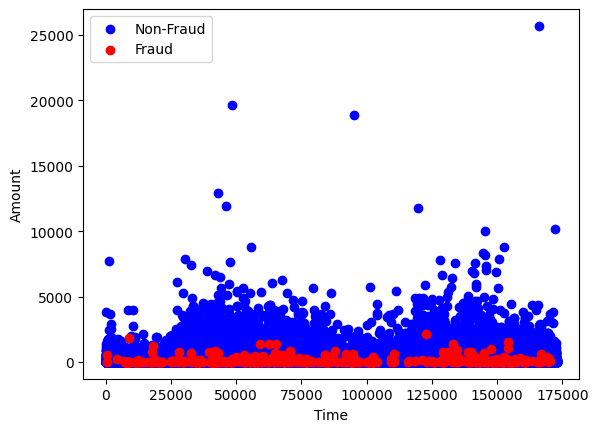

In [9]:
df_class_1 = df[df['Class'] == 1]
df_class_0 = df[df['Class'] == 0]
plt.scatter(df_class_0["Time"],df_class_0["Amount"], color='blue', label='Non-Fraud')
plt.scatter(df_class_1["Time"],df_class_1["Amount"], color='red', label='Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()

First, we can see with simple EDA, there are outliners that we can't really delete, the dataset is really unbalanced and we can't really know what is inside the V column.

Now we want to understand the correlation between the V classes and the rest of the variables.

In [10]:
df_with_6v = df[["Time", "Amount", "Class","V1","V2","V3","V4","V5","V6"]]
df_with_6v.head(10)

,Time,Amount,Class,V1,V2,V3,V4,V5,V6
0,0.0,149.62,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388
1,0.0,2.69,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361
2,1.0,378.66,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499
3,1.0,123.50,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203
4,2.0,69.99,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921
5,2.0,3.67,0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728
6,4.0,4.99,0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708
7,7.0,40.80,0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118
8,7.0,93.20,0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818
9,9.0,3.68,0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761


<Axes: >

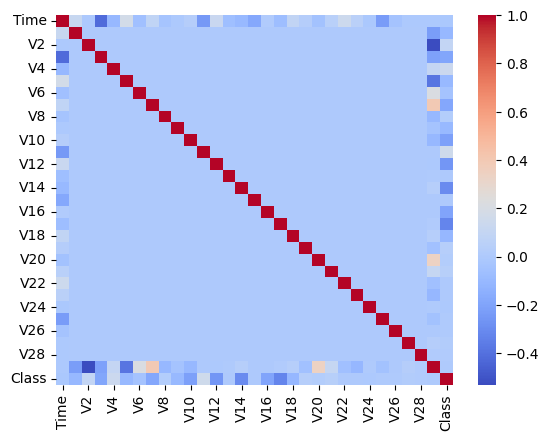

In [11]:
corr = df.corr(numeric_only=True)
sn.heatmap(corr, cmap='coolwarm')

<Axes: >

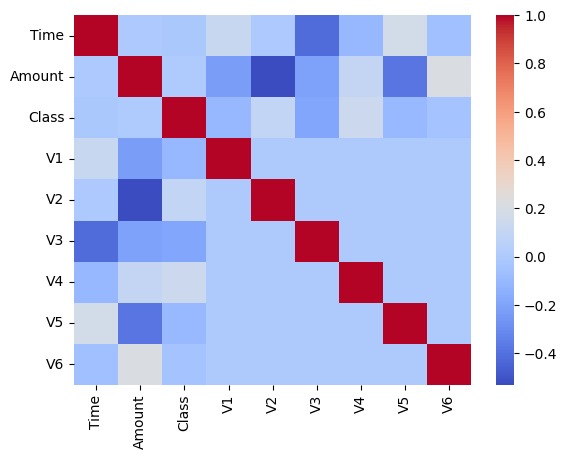

In [12]:
corr = df_with_6v.corr(numeric_only=True)
sn.heatmap(corr, cmap='coolwarm')

In [13]:
X = df.drop("Class",axis=1)
y = df["Class"]
print((y==1).sum())
print(y.shape)

492
(284807,)


# Machine learning predictions

In [14]:
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import chi2, SelectKBest, f_classif, f_regression, mutual_info_classif, mutual_info_regression, SelectFromModel, RFE, RFECV
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestRegressor, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Ridge, RidgeClassifierCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, precision_score, classification_report, average_precision_score
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from scipy.stats import randint, uniform
from sklearn.neighbors import KNeighborsClassifier
import optuna
import numpy as np
import tqdm as notebook_tqdm

C:\Users\Axel\Documents\MachineLearningProjects\creditcard_fraud\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df['amount_log'] = np.log1p(df['Amount'])
df['amount_time'] = df['Amount'] * df['Time']
df['time_log'] = np.log1p(df['Time'])

#df.drop(['Time','Amount'], axis=1, inplace=True)


We normalize the data that we can understand, in this case the column amount and time, to permit the algorithm a better learning

In [16]:
X = df.drop("Class",axis=1)
y = df["Class"]
print((y==1).sum())
print(y.shape)

492
(284807,)


In [17]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,scaled_amount,scaled_time,amount_log,amount_time,time_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983,5.014760,0.00,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983,1.305626,0.00,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972,5.939276,378.66,0.693147
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972,4.824306,123.50,0.693147
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960,4.262539,139.98,1.098612


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [84]:
print("X_train : ", X_train.shape)
print("y_train : ",y_train.shape)
print("X_test : ",X_test.shape)
print("y_test : ",y_test.shape)

X_train :  (213605, 35)
y_train :  (213605,)
X_test :  (71202, 35)
y_test :  (71202,)


Creation of little part of the dataset to test the best model to optimize for prediction

Application of SMOTE (Over-sampling)

SMOTE will be helpful to artificially create new points to balance our dataset

In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Classe avant SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Classe après SMOTE:", Counter(y_train_resampled))

X_resampled,_, y_resampled, _ = train_test_split(X_train_resampled, y_train_resampled, stratify=y_train_resampled,train_size=0.5, random_state=42)

print(X_resampled.shape)
print(y_resampled.shape)

Classe avant SMOTE: Counter({0: 213236, 1: 369})
Classe après SMOTE: Counter({0: 213236, 1: 213236})
(213236, 30)
(213236,)


We compare on a sample of our dataset to permit algorithms to learn faster, we keep an original hyperparameters

In [32]:
models = {
    "LighBoost Classifier :" : LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
    #"Hist Gradient Boosting Classifier : " : HistGradientBoostingClassifier(random_state=42),
    #"Cat Boost : " : CatBoostClassifier(random_state=2)
}

for name, model in models.items():
    print(f"Modèle en cours : {name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
    print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
    print(f"PR AUC: {average_precision_score(y_test, y_pred):.3f}")
    print(classification_report(y_test, y_pred, digits=3))
    print("------")


Modèle en cours : LighBoost Classifier :
[LightGBM] [Info] Number of positive: 213236, number of negative: 213236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 426472, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Precision: 0.658
Recall: 0.846
F1 Score: 0.740
ROC_AUC Score: 0.922
PR AUC: 0.557
              precision    recall  f1-score   support

           0      1.000     0.999     0.999     71079
           1      0.658     0.846     0.740       123

    accuracy                          0.999     71202
   macro avg      0.829     0.922     0.870     71202
weighted avg      0.999     0.999     0.999     71202

------
Modèle en cours : XGBoost
Precision: 

I saw that XGBoost was the faster with better result so I chose to optimize this algorithm

XGBoost

In [33]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
print(f"PR AUC: {average_precision_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, digits=3))
print("------")

Precision: 0.913
Recall: 0.764
F1 Score: 0.832
ROC_AUC Score: 0.882
PR AUC: 0.698
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     71079
           1      0.913     0.764     0.832       123

    accuracy                          0.999     71202
   macro avg      0.956     0.882     0.916     71202
weighted avg      0.999     0.999     0.999     71202

------


Optimisation of XGBoost

In [34]:
# Définir la fonction objectif
def objective(trial):
    # Définir les hyperparamètres à optimiser
    params = {
        'max_depth': trial.suggest_int("max_depth", 3, 12),
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3),
        'n_estimators': trial.suggest_int("n_estimators", 100, 1000),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'scale_pos_weight': trial.suggest_float("scale_pos_weight", 1, 20)
    }


    # Créer le modèle
    model = XGBClassifier(**params)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # Évaluer le modèle
    #score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3)
    

    return precision_score(y_test, y_pred)

# Créer une étude
study = optuna.create_study(direction='maximize')

# Optimiser la fonction objectif
study.optimize(objective, n_trials=100)

# Afficher les résultats
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2025-08-06 19:42:47,573] A new study created in memory with name: no-name-63aa1405-cf1a-4a00-86f1-39ff112401a9
[I 2025-08-06 19:42:56,071] Trial 0 finished with value: 0.8145161290322581 and parameters: {'max_depth': 3, 'learning_rate': 0.015049681096227098, 'n_estimators': 868, 'subsample': 0.5094403500520823, 'colsample_bytree': 0.8443355701555477, 'scale_pos_weight': 7.057962420379259}. Best is trial 0 with value: 0.8145161290322581.
[I 2025-08-06 19:42:59,390] Trial 1 finished with value: 0.9074074074074074 and parameters: {'max_depth': 10, 'learning_rate': 0.17624786717077298, 'n_estimators': 159, 'subsample': 0.6604698714155066, 'colsample_bytree': 0.7813619441374908, 'scale_pos_weight': 16.459825770526237}. Best is trial 1 with value: 0.9074074074074074.
[I 2025-08-06 19:43:11,461] Trial 2 finished with value: 0.9339622641509434 and parameters: {'max_depth': 9, 'learning_rate': 0.14382897503139003, 'n_estimators': 743, 'subsample': 0.8851049323671649, 'colsample_bytree': 0.81

Best trial:
  Value: 0.9696969696969697
  Params: 
    max_depth: 11
    learning_rate: 0.053605269193426015
    n_estimators: 941
    subsample: 0.9091121551644443
    colsample_bytree: 0.5544119850670367
    scale_pos_weight: 1.036182235177159


In [35]:
best_params = study.best_params
final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred):.3f}")
print(f"PR AUC: {average_precision_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, digits=3))
print("------")

Precision: 0.970
Recall: 0.780
F1 Score: 0.865
ROC_AUC Score: 0.890
PR AUC: 0.757
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     71079
           1      0.970     0.780     0.865       123

    accuracy                          1.000     71202
   macro avg      0.985     0.890     0.932     71202
weighted avg      1.000     1.000     1.000     71202

------


Our scores are quite low after optimisation of XGBoost from scikit learn. I'm gonna try the ensemble stacking method after try the xgboost method but from the lib xgboost with DMatrix.

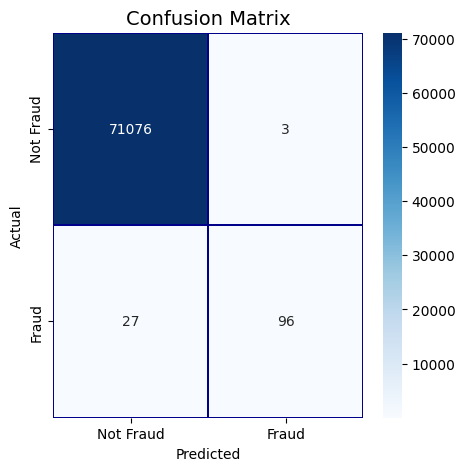

In [36]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sn.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            fmt='d',
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Ensemble learning (stacking)

In [121]:
models = {

    'etc' : ExtraTreesClassifier(n_estimators=300, max_depth=10, max_features='sqrt', random_state=42, n_jobs=-1),

    'gauss' : GaussianNB(),

    'mlp1': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=300, random_state=42),

    'dt1': DecisionTreeClassifier(max_depth=6, random_state=42),

    'logreg1': LogisticRegression(random_state=42, max_iter=1000, C=1.0),

    'rfc' : RandomForestClassifier(n_estimators=400, max_depth=10, max_features='sqrt', random_state=42, n_jobs=-1),

    'xgb' : XGBClassifier(n_estimators=1000, learning_rate=0.03, max_depth=10, subsample=0.75, colsample_bytree=0.7, random_state=42, use_label_encoder=False),

    'lgb' : LGBMClassifier(n_estimators=1500, learning_rate=0.02, max_depth=10, subsample=0.8, colsample_bytree=0.8, random_state=42),

    'cbc' : CatBoostClassifier(iterations=800, learning_rate=0.05, depth=6, random_seed=42, verbose=100),

    'hist': HistGradientBoostingClassifier(max_iter=200, learning_rate=0.05, max_depth=6, random_state=42)

}


Build the valid dataset

In [122]:
kf = KFold(n_splits=5,random_state=42, shuffle=True)
n_splits = 5

Create the array to store the predictions

In [123]:
oof = np.zeros((X_train.shape[0], len(models)))
pred_test1 = np.zeros((X_test.shape[0], len(models)))

In [ ]:
def models_training(i, name, model, oof, pred_test1):
    print(f"Training of the model : {name}")
    test_pred_fold = np.zeros((X_test.shape[0], n_splits))

    for j, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_fold_train,y_fold_train)

        oof[val_index,i] = model.predict_proba(X_fold_val)[:,1]

        test_pred_fold[:,j] = model.predict_proba(X_test)[:,1]

    pred_test1[:,i] = np.mean(test_pred_fold, axis=1)

    y_pred_train = (oof[:, i] >= 0.5).astype(int)  # seuil 0.5
    y_pred_test = (pred_test1[:, i] >= 0.5).astype(int)

    print(f"--- Résultats pour {name} ---")
    print(f"Train Precision: {precision_score(y_train, y_pred_train):.3f}")
    print(f"Train Recall:    {recall_score(y_train, y_pred_train):.3f}")
    print(f"Train F1 Score:  {f1_score(y_train, y_pred_train):.3f}")
    print(f"Test Precision:  {precision_score(y_test, y_pred_test):.3f}")
    print(f"Test Recall:     {recall_score(y_test, y_pred_test):.3f}")
    print(f"Test F1 Score:   {f1_score(y_test, y_pred_test):.3f}")
    print(f"ROC AUC (test):  {roc_auc_score(y_test, pred_test1[:, i]):.3f}")
    print("----------------------------\n")

Function to train all the models

In [125]:
for i, (name, model) in enumerate(models.items()):    
    models_training(i,name,model,oof,pred_test1)

Training of the model : etc
--- Résultats pour etc ---
Train Precision: 0.949
Train Recall:    0.602
Train F1 Score:  0.736
Test Precision:  0.971
Test Recall:     0.553
Test F1 Score:   0.705
ROC AUC (test):  0.974
----------------------------

Training of the model : gauss
--- Résultats pour gauss ---
Train Precision: 0.000
Train Recall:    0.000
Train F1 Score:  0.000
Test Precision:  0.000
Test Recall:     0.000
Test F1 Score:   0.000
ROC AUC (test):  0.594
----------------------------

Training of the model : mlp1
--- Résultats pour mlp1 ---
Train Precision: 0.299
Train Recall:    0.133
Train F1 Score:  0.184
Test Precision:  0.320
Test Recall:     0.065
Test F1 Score:   0.108
ROC AUC (test):  0.649
----------------------------

Training of the model : dt1
--- Résultats pour dt1 ---
Train Precision: 0.886
Train Recall:    0.759
Train F1 Score:  0.818
Test Precision:  0.925
Test Recall:     0.805
Test F1 Score:   0.861
ROC AUC (test):  0.929
----------------------------

Training o

C:\Users\Axel\Documents\MachineLearningProjects\creditcard_fraud\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:22:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Axel\Documents\MachineLearningProjects\creditcard_fraud\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:22:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Axel\Documents\MachineLearningProjects\creditcard_fraud\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:22:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Axel\Documents\MachineLearningProjects\creditcard_fraud\venv\Lib\site-packages\xgboos

--- Résultats pour xgb ---
Train Precision: 0.945
Train Recall:    0.791
Train F1 Score:  0.861
Test Precision:  0.951
Test Recall:     0.789
Test F1 Score:   0.862
ROC AUC (test):  0.982
----------------------------

Training of the model : lgb
[LightGBM] [Info] Number of positive: 293, number of negative: 170591
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 170884, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001715 -> initscore=-6.366852
[LightGBM] [Info] Start training from score -6.366852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

Optimisation of the last layer (Simple MLP in our case) of the ensemble method

In [138]:
# Définir la fonction objectif
def objective(trial):
    
    params = {
        'max_iter' : trial.suggest_int("max_iter",50, 2000),
    }


    # Créer le modèle
    model = MLPClassifier(**params,random_state=42)
    model.fit(oof,y_train)
    y_pred = model.predict(pred_test1)
    y_pred_proba = model.predict_proba(pred_test1)

    # Évaluer le modèle
    #score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3)
    

    return average_precision_score(y_test, y_pred_proba[:,1])

# Créer une étude
study = optuna.create_study(direction='maximize')

# Optimiser la fonction objectif
study.optimize(objective, n_trials=100)

# Afficher les résultats
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2025-08-11 02:57:20,635] A new study created in memory with name: no-name-e583fc25-9555-4dec-858a-0ffd24c93d1a
[I 2025-08-11 02:57:26,857] Trial 0 finished with value: 0.8556783764531327 and parameters: {'max_iter': 1178}. Best is trial 0 with value: 0.8556783764531327.
[I 2025-08-11 02:57:33,181] Trial 1 finished with value: 0.8556783764531327 and parameters: {'max_iter': 464}. Best is trial 0 with value: 0.8556783764531327.
[I 2025-08-11 02:57:39,336] Trial 2 finished with value: 0.8556783764531327 and parameters: {'max_iter': 1030}. Best is trial 0 with value: 0.8556783764531327.
[I 2025-08-11 02:57:45,704] Trial 3 finished with value: 0.8556783764531327 and parameters: {'max_iter': 957}. Best is trial 0 with value: 0.8556783764531327.
[I 2025-08-11 02:57:52,249] Trial 4 finished with value: 0.8556783764531327 and parameters: {'max_iter': 1881}. Best is trial 0 with value: 0.8556783764531327.
[I 2025-08-11 02:57:58,380] Trial 5 finished with value: 0.8556783764531327 and paramete

Best trial:
  Value: 0.8556783764531327
  Params: 
    max_iter: 1178


Final score

In [139]:

#best_params = study.best_params
meta_model = MLPClassifier(random_state=42,max_iter=1178)
#meta_model = CatBoostClassifier(random_seed=42, depth=8, learning_rate=0.05, iterations=1000)
meta_model.fit(oof,y_train)



final_prediction = meta_model.predict(pred_test1)
final_prediction_proba = meta_model.predict_proba(pred_test1)

print(f"Precision: {precision_score(y_test, final_prediction):.3f}")
print(f"Recall: {recall_score(y_test, final_prediction):.3f}")
print(f"F1 Score: {f1_score(y_test, final_prediction):.3f}")
print(f"ROC_AUC Score: {roc_auc_score(y_test, final_prediction_proba[:,1]):.3f}")
print(f"PR AUC: {average_precision_score(y_test, final_prediction_proba[:,1]):.3f}")
print(classification_report(y_test, final_prediction, digits=3))
print("------")

Precision: 0.934
Recall: 0.805
F1 Score: 0.865
ROC_AUC Score: 0.967
PR AUC: 0.856
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     71079
           1      0.934     0.805     0.865       123

    accuracy                          1.000     71202
   macro avg      0.967     0.902     0.932     71202
weighted avg      1.000     1.000     1.000     71202

------


Display the correlation to see where the last layer learn from the mistake of the first layer 

In [26]:
pd.DataFrame(oof).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.397314,0.528965,0.918782,0.929989,0.977813,0.950761,0.936619,0.949915,0.790710
1,0.397314,1.000000,0.252204,0.344375,0.388600,0.381419,0.349975,0.343473,0.350008,0.325809
2,0.528965,0.252204,1.000000,0.499743,0.516142,0.526366,0.510472,0.501522,0.509319,0.422034
3,0.918782,0.344375,0.499743,1.000000,0.846039,0.945013,0.934386,0.930751,0.937227,0.764325
4,0.929989,0.388600,0.516142,0.846039,1.000000,0.908272,0.882440,0.863740,0.883138,0.746481
5,0.977813,0.381419,0.526366,0.945013,0.908272,1.000000,0.979132,0.969913,0.979043,0.811390
6,0.950761,0.349975,0.510472,0.934386,0.882440,0.979132,1.000000,0.987393,0.992502,0.804732
7,0.936619,0.343473,0.501522,0.930751,0.863740,0.969913,0.987393,1.000000,0.985384,0.798949
8,0.949915,0.350008,0.509319,0.937227,0.883138,0.979043,0.992502,0.985384,1.000000,0.805193
9,0.790710,0.325809,0.422034,0.764325,0.746481,0.811390,0.804732,0.798949,0.805193,1.000000


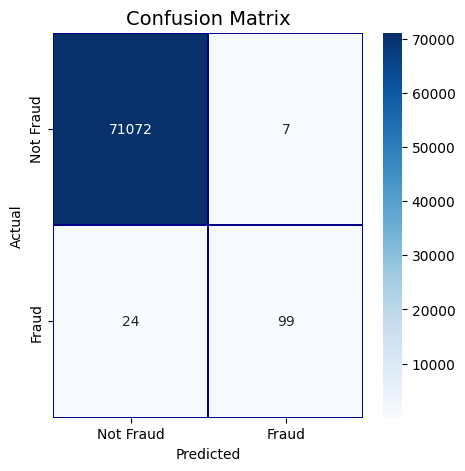

In [134]:
cm = pd.crosstab(y_test, final_prediction, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sn.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            fmt='d',
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Now I'm going to use the XGBoost method but more precisely with the original lib and not schikit learn one

In [19]:


train_df, test_df = train_test_split(df, test_size=0.25, random_state=42, shuffle=True )
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True )

target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount','scaled_amount','scaled_time','amount_log','amount_time','time_log']

# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'aucpr'
params['random_state'] = 42

I focus the training with the metric AUC PR, which is important and useful in this case

In [20]:
model = xgb.train(params, 
                dtrain, 
                1000, 
                watchlist, 
                early_stopping_rounds=50, 
                maximize=True
                )

C:\Users\Axel\Documents\MachineLearningProjects\creditcard_fraud\venv\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
C:\Users\Axel\Documents\MachineLearningProjects\creditcard_fraud\venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [17:46:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.

  self.starting_round = model.num_boosted_rounds()


[0]	train-aucpr:0.28871	valid-aucpr:0.29475
[1]	train-aucpr:0.70678	valid-aucpr:0.72516
[2]	train-aucpr:0.70591	valid-aucpr:0.72267
[3]	train-aucpr:0.71072	valid-aucpr:0.72399
[4]	train-aucpr:0.71137	valid-aucpr:0.72520
[5]	train-aucpr:0.71541	valid-aucpr:0.73101
[6]	train-aucpr:0.71643	valid-aucpr:0.73374
[7]	train-aucpr:0.71641	valid-aucpr:0.73396
[8]	train-aucpr:0.71706	valid-aucpr:0.73873
[9]	train-aucpr:0.71807	valid-aucpr:0.73939
[10]	train-aucpr:0.71853	valid-aucpr:0.74136
[11]	train-aucpr:0.71877	valid-aucpr:0.74160
[12]	train-aucpr:0.71796	valid-aucpr:0.74133
[13]	train-aucpr:0.71951	valid-aucpr:0.74231
[14]	train-aucpr:0.71871	valid-aucpr:0.74148
[15]	train-aucpr:0.71904	valid-aucpr:0.74060
[16]	train-aucpr:0.71926	valid-aucpr:0.74098
[17]	train-aucpr:0.71962	valid-aucpr:0.74123
[18]	train-aucpr:0.72051	valid-aucpr:0.74187
[19]	train-aucpr:0.72057	valid-aucpr:0.74163
[20]	train-aucpr:0.72075	valid-aucpr:0.74187
[21]	train-aucpr:0.72094	valid-aucpr:0.74187
[22]	train-aucpr:0.7

In [21]:
y_true = test_df[target].values
preds_proba = model.predict(dtest)  # probabilités continues entre 0 et 1
preds = (preds_proba >= 0.5).astype(int)  # conversion en 0 ou 1
print(f"Precision: {precision_score(y_true, preds):.3f}")
print(f"Recall: {recall_score(y_true, preds):.3f}")
print(f"F1 Score: {f1_score(y_true, preds):.3f}")
print(f"ROC_AUC Score: {roc_auc_score(y_true, preds_proba):.3f}")
print(f"PR AUC: {average_precision_score(y_true, preds_proba):.3f}")
print("------")

Precision: 0.967
Recall: 0.788
F1 Score: 0.868
ROC_AUC Score: 0.990
PR AUC: 0.888
------


We can see that the model can have a precision of 96,7%, a AUC ROC score of 99% and AUC PR score of 88,8%. Which is pretty good

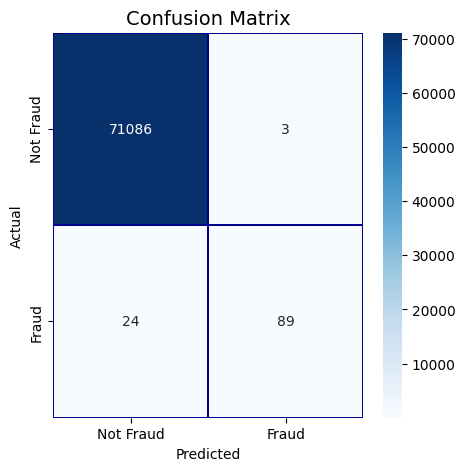

In [22]:
cm = pd.crosstab(y_true, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sn.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            fmt='d',
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()